In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Utils.styles import *

In [2]:
input_filename = "Volume_CSV/results.csv"

with open(input_filename, 'r') as f:
        ni = int(f.readline().strip().split('=')[1])
        nj = int(f.readline().strip().split('=')[1])
        nk = int(f.readline().strip().split('=')[1])
    
    
df = pd.read_csv(input_filename, skiprows=3)
data = {col: df[col].to_numpy().reshape((ni, nj, nk)) for col in df.columns}

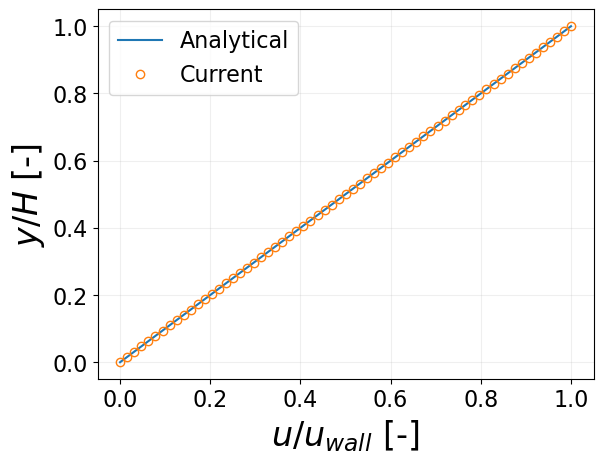

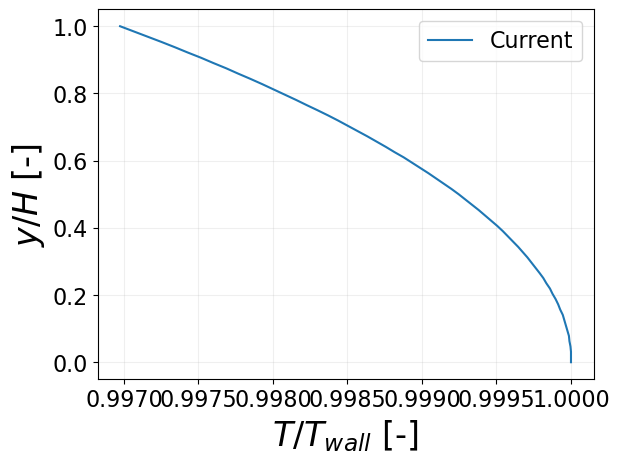

In [22]:
zCheck = 30
u = data['Velocity Z'][3, :, 3]
ymax = data['y'][3, :, 3].max()
umax = u.max()
tmax = data['Temperature'][3, :, 3].max()
tmin = data['Temperature'][3, :, 3].min()
smax = data['Entropy'][3, :, 3].max()

y = data['y'][3, :, 3]
uanalytic = u[0] + (u[-1]-u[0])*(y-y[0])/(y[-1]-y[0])

plt.figure()
plt.plot(uanalytic/umax, data['y'][3, :, 3]/ymax, '-',label='Analytical')
plt.plot(data['Velocity Z'][3, :, 3]/umax, data['y'][3, :, 3]/ymax, 'o', mfc='none',label='Current')
plt.legend()
plt.ylabel(r'$y/H$ [-]')
plt.xlabel(r'$u/u_{wall}$ [-]')
plt.grid(alpha=0.2)
plt.savefig('Pictures/couette_uz.pdf', bbox_inches='tight')

plt.figure()
plt.plot((data['Temperature'][3, :, 3])/tmax, data['y'][3, :, 3]/ymax, '-',label='Current')
plt.legend()
plt.ylabel(r'$y/H$ [-]')
plt.xlabel(r'$T/T_{wall}$ [-]')
plt.grid(alpha=0.2)
plt.savefig('Pictures/couette_t.pdf', bbox_inches='tight')


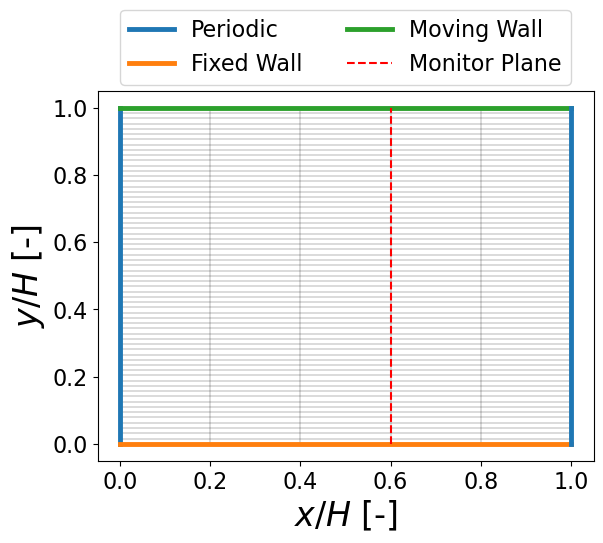

In [23]:
L = data['y'][0, -1, 0]
xComparison = L/2
ni,nj,nk = data['x'].shape
for i in range(1, ni-1):
    plt.plot(data['x'][i, :, 0]/L, data['y'][i, :, 0]/L, 'k', lw=0.2)
for j in range(1, nj-1):
    plt.plot(data['x'][:, j, 0]/L, data['y'][:, j, 0]/L, 'k', lw=0.2)

plt.plot(data['x'][0, :, 0]/L, data['y'][0, :, 0]/L, 'C0', label='Periodic', lw=3.5)
plt.plot(data['x'][:, 0, 0]/L, data['y'][:, 0, 0]/L, 'C1', label='Fixed Wall', lw=3.5)
plt.plot(data['x'][:, -1, 0]/L, data['y'][:, -1, 0]/L, 'C2', label='Moving Wall', lw=3.5)
plt.plot(data['x'][-1, :, 0]/L, data['y'][-1, :, 0]/L, 'C0', lw=3.5)
iCheck = np.argmin(np.abs(data['x'][:, 0, 0]-xComparison))
plt.plot(data['x'][iCheck, :, 0]/L, data['y'][-1, :, 0]/L, '--r', lw=1.5, label='Monitor Plane')


plt.xlabel(r'$x/H$ [-]')
plt.ylabel(r'$y/H$ [-]')


plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.25), loc='upper center')
plt.savefig('Pictures/couette_grid.pdf', bbox_inches='tight')